## Convolutional Neural Network

A **Convolutional Neural Network (ConvNet/CNN)** is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.
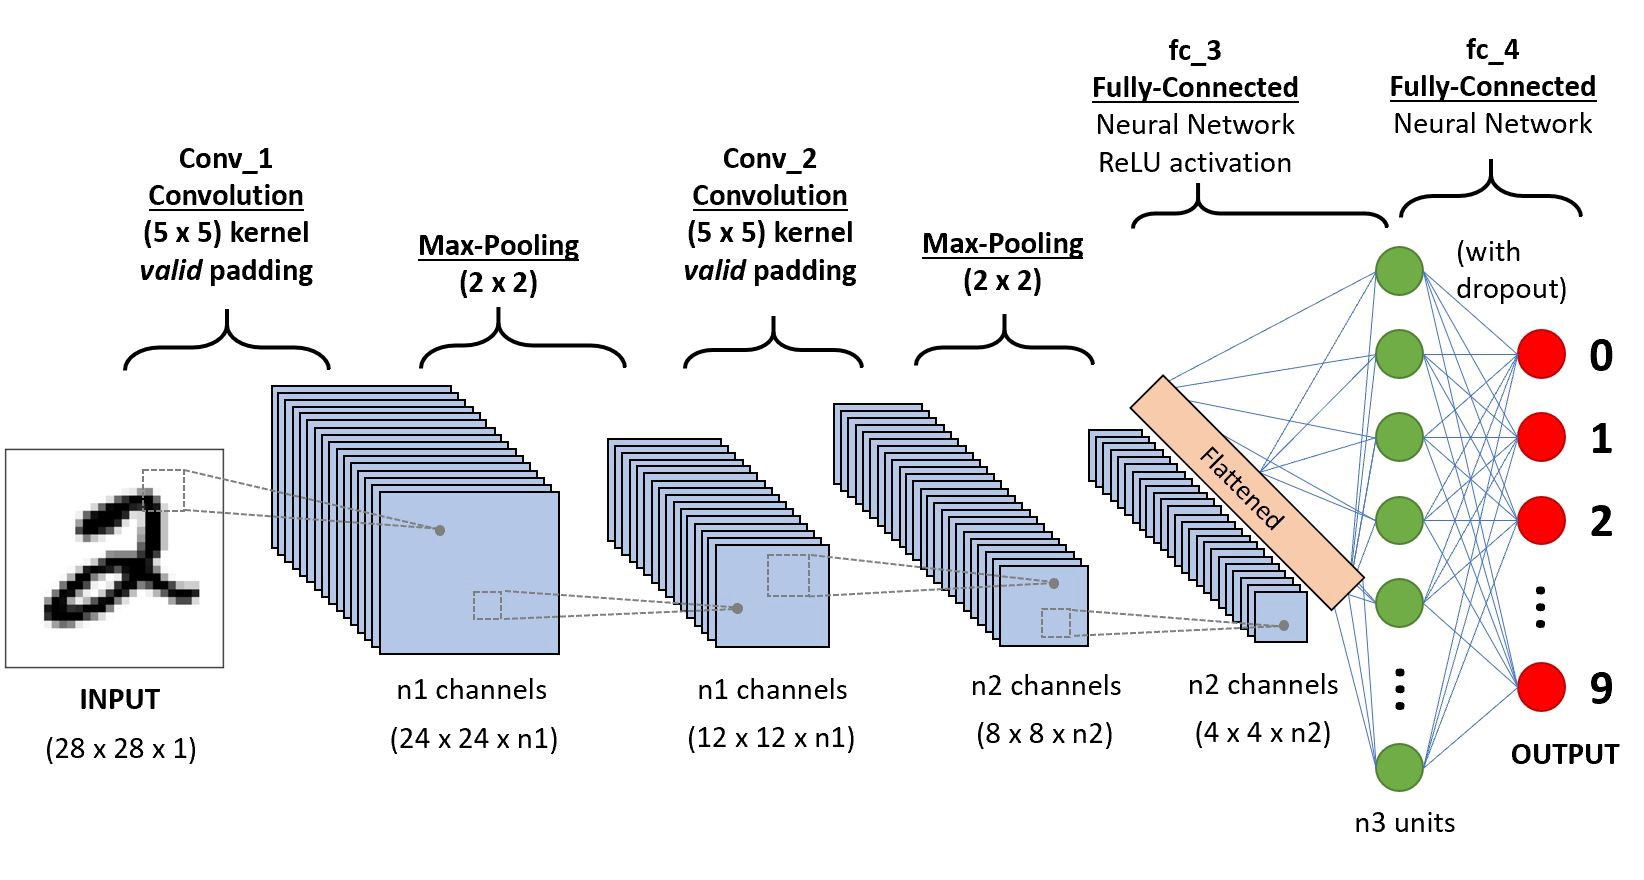
    
                            A CNN sequence to classify handwritten digits

The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

An image is nothing but a matrix of pixel values, So why not just flatten the image (e.g. 3x3 image matrix into a 9x1 vector) and feed it to a Multi-Level Perceptron for classification purposes?  
In cases of extremely basic binary images, the method (Multi-Level Perceptron) might show an average precision score while performing prediction of classes but would have little to no accuracy when it comes to complex images having pixel dependencies throughout.

A ConvNet is able to successfully capture the Spatial and Temporal dependencies in an image through the application of relevant filters. The architecture performs a better fitting to the image dataset due to the reduction in the number of parameters involved and reusability of weights. In other words, the network can be trained to understand the sophistication of the image better.

We can imagine how computationally intensive things would get once the images reach dimensions, say 8K (7680×4320). The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction. This is important when we are to design an architecture which is not only good at learning features but also is scalable to massive datasets.



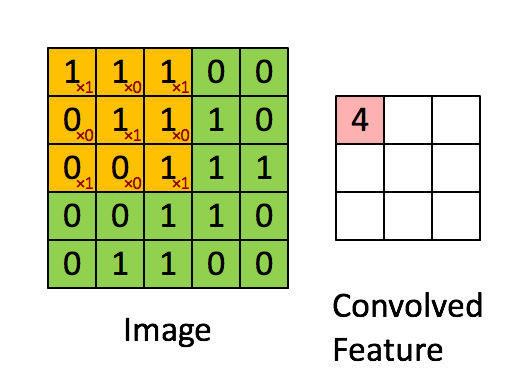

Image Dimensions = 5 (Height) x 5 (Breadth) x 1 (Number of channels, eg. RGB)
In the above demonstration, the green section resembles our 5x5x1 input image, I. The element involved in carrying out the convolution operation in the first part of a Convolutional Layer is called the Kernel/Filter, K, represented in the color yellow. We have selected K as a 3x3x1 matrix.

The Kernel shifts 9 times because of Stride Length = 1 (Non-Strided), every time performing a matrix multiplication operation between K and the portion P of the image over which the kernel is hovering.

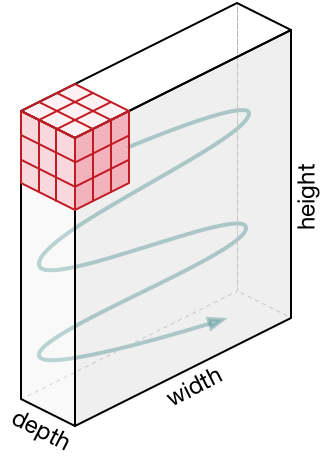

The filter moves to the right with a certain Stride Value till it parses the complete width. Moving on, it hops down to the beginning (left) of the image with the same Stride Value and repeats the process until the entire image is traversed.

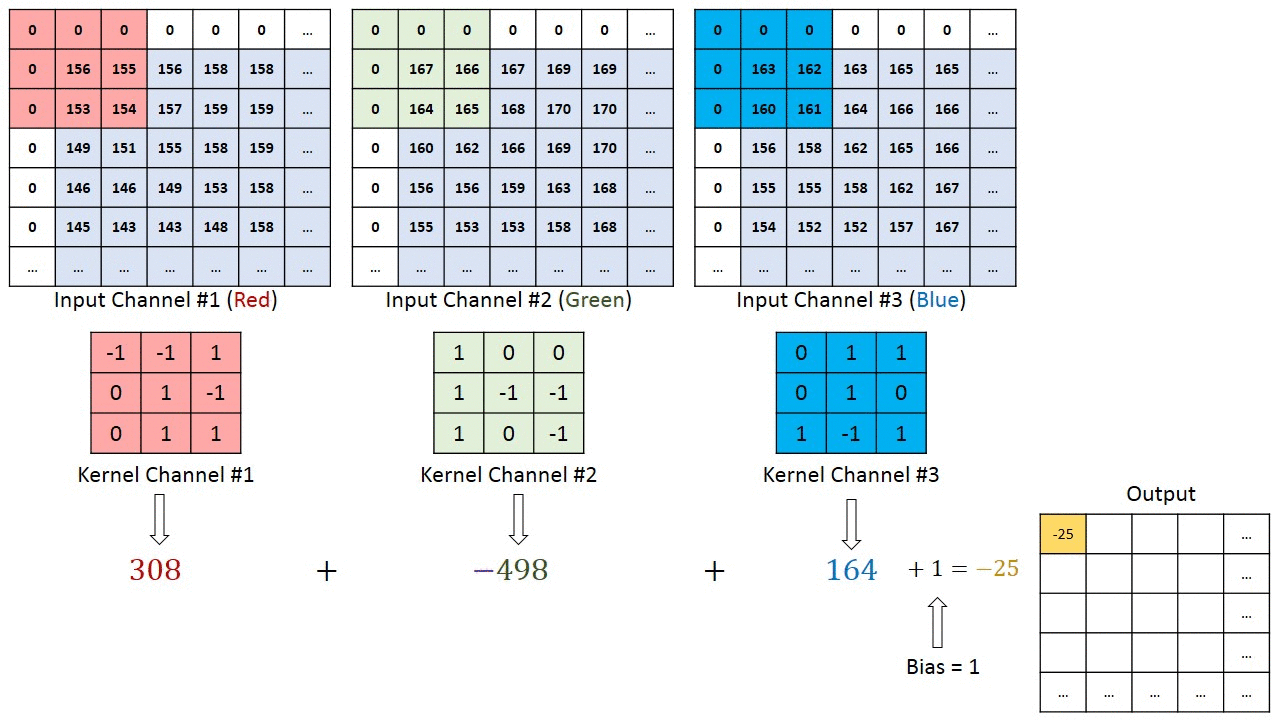

                    Convolution operation on a MxNx3 image matrix with a 3x3x3 Kernel

In the case of images with multiple channels (e.g. RGB), the Kernel has the same depth as that of the input image. Matrix Multiplication is performed between Kn and In stack ([K1, I1]; [K2, I2]; [K3, I3]) and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output.

The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would.

#### Padding
There are two types of results to the operation — one in which the convolved feature is reduced in dimensionality as compared to the input, and the other in which the dimensionality is either increased or remains the same. This is done by applying Valid Padding in case of the former, or Same Padding in the case of the latter.

When we augment the 5x5x1 image into a 7x7x1 image and then apply the 3x3x1 kernel over it, we find that the convolved matrix turns out to be of dimensions 5x5x1. Hence the name — Same Padding.  
On the other hand, if we perform the same operation without padding, we are presented with a matrix which has dimensions of the Kernel (3x3x1) itself — Valid Padding.

#### Strides

Stride is the number of pixels shifts over the input matrix. When the stride is 1 then we move the filters to 1 pixel at a time. When the stride is 2 then we move the filters to 2 pixels at a time and so on. The below figure shows convolution would work with a stride of 2.
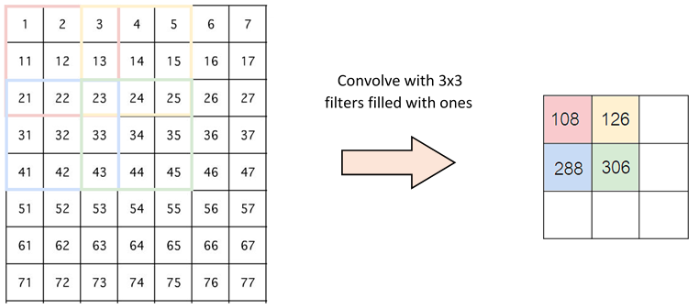
             
                                         Stride of 2 pixels

#### Non Linearity (ReLU)
ReLU stands for Rectified Linear Unit for a non-linear operation. The output is ƒ(x) = max(0,x).
Why ReLU is important : ReLU’s purpose is to introduce non-linearity in our ConvNet. Since, the real world data would want our ConvNet to learn would be non-negative linear values.
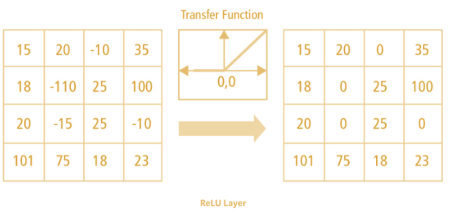

                                        ReLU operation
There are other non linear functions such as tanh or sigmoid that can also be used instead of ReLU. Most of the data scientists use ReLU since performance wise ReLU is better than the other two.

#### Pooling Layer

Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training of the model.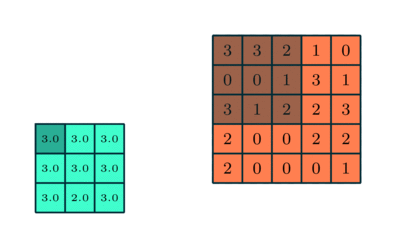

                                3x3 pooling over 5x5 convolved feature
There are two types of Pooling: Max Pooling and Average Pooling.  
Max Pooling returns the maximum value from the portion of the image covered by the Kernel. On the other hand, Average Pooling returns the average of all the values from the portion of the image covered by the Kernel.  
Max Pooling also performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. On the other hand, Average Pooling simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.

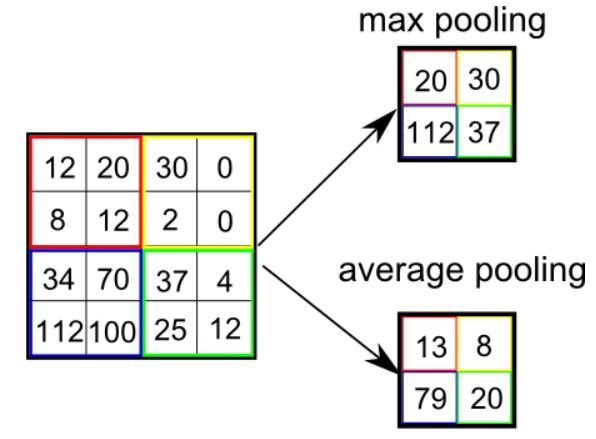

The Convolutional Layer and the Pooling Layer, together form the i-th layer of a Convolutional Neural Network. Depending on the complexities in the images, the number of such layers may be increased for capturing low-levels details even further, but at the cost of more computational power.
After going through the above process, we have successfully enabled the model to understand the features. Moving on, we are going to flatten the final output and feed it to a regular Neural Network for classification purposes.

#### Classification — Fully Connected Layer (FC Layer)
Adding a Fully-Connected layer is a (usually) cheap way of learning non-linear combinations of the high-level features as represented by the output of the convolutional layer. The Fully-Connected layer is learning a possibly non-linear function in that space.
Now that we have converted our input image into a suitable form for our Multi-Level Perceptron, we shall flatten the image into a column vector. The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training. Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them using the Softmax Classification technique.
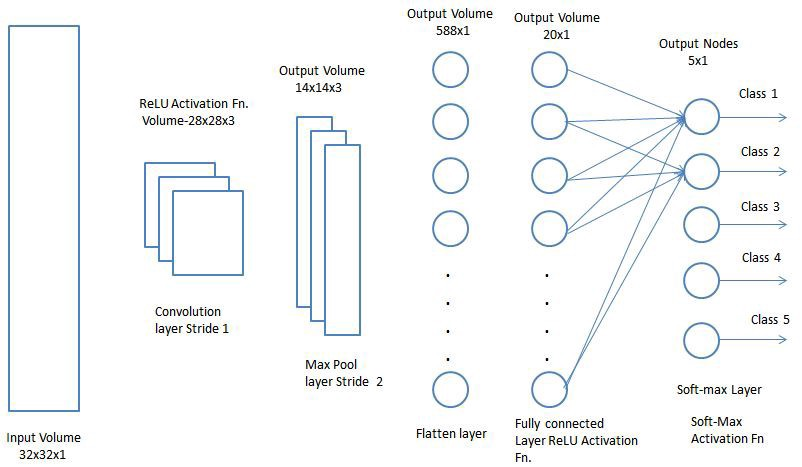

### Building a Convolutional Neural Network (CNN) in Keras

In this example, we will use the mnist dataset. This dataset consists of 70,000 images of handwritten digits from 0–9. We will attempt to identify them using a CNN.

##### Loading the dataset

The mnist dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset. Out of the 70,000 images provided in the dataset, 60,000 are given for training and 10,000 are given for testing.

When we load the dataset below, X_train and X_test will contain the images, and y_train and y_test will contain the digits that those images represent.

In [14]:
from keras.datasets import mnist

#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

##### Exploratory data analysis

Now let’s take a look at one of the images in our dataset to see what we are working with. We will plot the first image in our dataset and check its size using the ‘shape’ function.

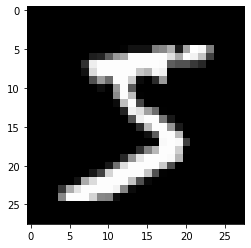

In [15]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(X_train[0], cmap='gray')

In [16]:
#check image shape
X_train[0].shape

(28, 28)

By default, the shape of every image in the mnist dataset is 28 x 28, so we will not need to check the shape of all the images. When using real-world datasets, we may not be so lucky. 28 x 28 is also a fairly small size, so the CNN will be able to run over each image pretty quickly.

##### Data pre-processing

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [17]:
#reshape data to fit model
X_train_1 = X_train.reshape(60000,28,28,1)
X_test_1 = X_test.reshape(10000,28,28,1)

We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.

In [18]:
from keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##### Building the model

Now we are ready to build our model. Here is the code for CNN:

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows us to build a model layer by layer.

We use the ‘add()’ function to add layers to our model.

Our first 2 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.

64 in the first layer and 32 in the second layer are the number of nodes in each layer. This number can be adjusted to be higher or lower, depending on the size of the dataset.

Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix.

Activation is the activation function for the layer. The activation function we will be using for our first 2 layers is the ReLU, or Rectified Linear Activation.

Our first layer also takes in an input shape. This is the shape of each input image, 28,28,1 as seen earlier on, with the 1 signifying that the images are greyscale.

In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.

‘Dense’ is the layer type we will use in for our output layer.

We will have 10 nodes in our output layer, one for each possible outcome (0–9).

The activation is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

##### Compiling the model

Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss and metrics.

The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. The adam optimizer adjusts the learning rate throughout training.

The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

We will use ‘categorical_crossentropy’ for our loss function. A lower score indicates that the model is performing better.

To make things even easier to interpret, we will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.

In [20]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### Training the model

Now we will train our model. To train, we will use the ‘fit()’ function on our model with the following parameters: training data (train_X), target data (train_y), validation data, and the number of epochs.

For our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test.

The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. For our model, we will set the number of epochs to 10.


In [21]:
#train the model
model.fit(X_train_1, y_train, validation_data=(X_test_1, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 287s 5ms/step - loss: 0.2330 - accuracy: 0.9517 - val_loss: 0.0909 - val_accuracy: 0.9734
Epoch 2/5
60000/60000 [==============================] - 280s 5ms/step - loss: 0.0692 - accuracy: 0.9791 - val_loss: 0.0787 - val_accuracy: 0.9760
Epoch 3/5
60000/60000 [==============================] - 281s 5ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0920 - val_accuracy: 0.9742
Epoch 4/5
60000/60000 [==============================] - 286s 5ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.1023 - val_accuracy: 0.9762
Epoch 5/5
60000/60000 [==============================] - 290s 5ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.1187 - val_accuracy: 0.9736


After 5 epochs, we have gotten to 97% accuracy on our validation set.

##### Using our model to make predictions

If we want to see the actual predictions that our model has made for the test data, we can use the predict function. The predict function will give an array with 10 numbers. These numbers are the probabilities that the input image represents each digit (0–9). The array index with the highest number represents the model prediction. The sum of each array equals 1 (since each number is a probability).

To show this, we will show the predictions for the first 4 images in the test set.

Note: If we have new data, we can input our new data into the predict function to see the predictions our model makes on the new data. Since we don’t have any new unseen data, we will show predictions using the test set for now.

In [22]:
#predict first 4 images in the test set
model.predict(X_test_1[:4])

array([[5.6510324e-15, 8.6220344e-20, 7.7533039e-14, 3.2663449e-12,
        2.5843257e-19, 7.9021154e-16, 1.2255064e-22, 1.0000000e+00,
        4.4740581e-13, 1.7237316e-10],
       [1.3026190e-09, 9.7117644e-12, 1.0000000e+00, 1.6703451e-09,
        8.3530222e-15, 3.8179166e-18, 3.1956776e-10, 2.0801520e-15,
        1.4028252e-10, 1.6837416e-16],
       [1.1219384e-12, 9.9999928e-01, 2.5763251e-07, 2.6201710e-10,
        3.5404071e-07, 2.6899302e-10, 1.9134694e-10, 3.0614782e-11,
        6.0075180e-08, 8.7345235e-11],
       [1.0000000e+00, 1.7502075e-15, 1.9382938e-11, 7.8850763e-15,
        2.0402753e-12, 2.1793414e-14, 6.3010422e-12, 3.9426909e-13,
        1.8797708e-14, 3.0680788e-08]], dtype=float32)

We can see that our model predicted 7, 2, 1 and 0 for the first four images.

Let’s compare this with the actual results.

In [23]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

The actual results show that the first four images are also 7, 2,1 and 0. Our model predicted correctly!

We can also plot our first image and see if it is 7 as our model predicted.

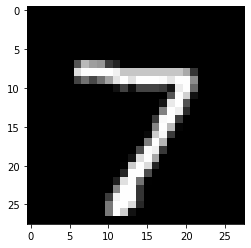

In [24]:
plt.imshow(X_test[0], cmap='gray')

#### Advantages of Convolutional Network Architecture
• Minimize computation compared to a regular neural network.  
• Convolution simplifies computation to a great extent without losing the essence of the data.  
• They are great at handling image classification.  
• They use the same knowledge across all image locations.

#### Disadvantages of Convolutional Network Architecture
• Orientation and placements of various parts of the objects in the image are not taken into account.  
• Routing of high dimensional data to specific neurons to improve predictions: Send the vector of the mouth prediction to the neurons that deal with the prediction of faces, and not to the one that predicts cars.  
• There is no encoding of pose and orientation of the image: Neural activities need to be different for same objects with different poses.

#### Questionnaire

##### Explain with an example how to overcome overfitting in Convolutional Neural Networks (CNNs) in Python.

[Solution](https://github.com/ebi-byte/kt/blob/master/CNN/Convolutional%20Neural%20Networks%20in%20Python.ipynb)